# MultiForest optimization notebook
# NORWAY

Above the code cells, there are short instructions how the users can modify the codes in the cells.<br>
If there are no instructions, no changes should be needed for the cell by default.

A detailed description is provided in the <b>README.md</b>.

## Basic definitions
Simulated forest data - name and climate scenario

In [1]:
RCP = "RCP45" # NDC scenario

Specify policy scenario:

- "FS" -  National Forest Strategy
- "BDS" - Biodiversity Strategy
- "BES" - Bioeconomy Strategy

In [2]:
scenario ="BES"

## Read .py class & data

In [3]:
import wget
import os
import numpy as np
import pandas as pd
import sys

In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/py_class")

import multiFunctionalOptimizationNor as MFO

In [5]:
from importlib import reload
reload(MFO)

<module 'multiFunctionalOptimizationNor' from '/home/ubuntu/workspace/mf_optimization_demo/py_class/multiFunctionalOptimizationNor.py'>

In [6]:
mfo = MFO.MultiFunctionalOptimization(solver = 'CPLEX')

'Using CPLEX'

<b>You need to "unrar" the file testData.rar first</b>

In [7]:
filename = "testData.csv"
filename

'testData.csv'

In [8]:
filename

'testData.csv'

In [9]:
%%time
mfo.readData(filename,standsEnu = "plot_id",delimeter = ",",
             areaCol = "tsd_ha2total", 
             sampleRatio=1) #If no sample ratio given, the ratio is assumed to be 1
                             #0.2 means 20% of the data

CPU times: user 1.25 s, sys: 1.6 s, total: 2.85 s
Wall time: 2.85 s


In [10]:
mfo.data.columns

Index(['plot_id', 'year', 'regime', 'period', 'pulp_vol_m3',
       'harv_cost_nok_m3', 'harv_cost_u150', 'harv_cost_u200',
       'net_increment_m3', 'is_old', 'is_broadleave', 'MiS_classified_plot',
       'bilberry_cover_pr', 'GROT_kt_TotNor', 'vol_saw_m3', 'saw_CO2_t',
       'vol_panels_m3', 'panels_CO2_t', 'albedo', 'is_steep_terrain',
       'is_vernskog', 'is_city_forest', 'shan', 'class_dbh', 'ha2total',
       'management', 'harv_net_Mnok_TotNor', 'harv_vol_Mm3_TotNor',
       'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor', 'dead_vol_Mm3_TotNor',
       'tsd_ha2total', 'CO2_forest_Mil_Kt_TotNor',
       'CO2_forest_Mil_Kt_TotNor_no_albedo', 'saw_CO2_change_Kt_TotNor',
       'saw_CO2_Kt_TotNor', 'panels_CO2_change_Kt_TotNor', 'HWP_C02_TotNor',
       'Bilberry_ha_TotNor', 'MiS_ha', 'SawTimber_Mm3_year', 'pulp_Mm3_year',
       'GROT_t', 'GROT_m3', 'GROT_Mm3', 'Residues_Mm3_year',
       'harvest_demands_Mm3_year', 'regime.class', 'finalFelling', 'is_CCF',
       'is_nomanagement

In [11]:
mfo.finalizeData(initialTime = 2023)

In [12]:
mfo.initialData.head()

period   pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                       
A03187-1 2023 SimOpt_extensive_0      t1  35612.018505        909.320021   
              SimOpt_extensive_1      t1      0.000000          0.000000   
              SimOpt_extensive_10     t1      0.000000          0.000000   
              SimOpt_extensive_11     t1      0.000000          0.000000   
              SimOpt_extensive_12     t1      0.000000          0.000000   

                                   harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                
A03187-1 2023 SimOpt_extensive_0                0               0   
              SimOpt_extensive_1                0               0   
              SimOpt_extensive_10               0               0   
              SimOpt_extensive_11               0               0   
              SimOpt_extensive_12               0               0   

                                   net_increment_m3  is_old  is_broadleave  \
plot_id  year regime                                                         
A03187-1 2023 SimOpt_extensive_0        2195.434622       0              0   
              SimOpt_extensive_1        4592.344651       0              0   
              SimOpt_extensive_10       4592.344651       0              0   
              SimOpt_extensive_11       4592.344651       0              0   
              SimOpt_extensive_12       4592.344651       0              0   

                                   MiS_classified_plot  bilberry_cover_pr  \
plot_id  year regime                                                        
A03187-1 2023 SimOpt_extensive_0                     0                  2   
              SimOpt_extensive_1                     0                  4   
              SimOpt_extensive_10                    0                  4   
              SimOpt_extensive_11                    0                  4   
              SimOpt_extensive_12                    0                  4   

                                   ...  Relative_albedo  Relative_shan  \
plot_id  year regime               ...                                   
A03187-1 2023 SimOpt_extensive_0   ...         0.000519       0.000000   
              SimOpt_extensive_1   ...         0.000458       0.000202   
              SimOpt_extensive_10  ...         0.000458       0.000202   
              SimOpt_extensive_11  ...         0.000458       0.000202   
              SimOpt_extensive_12  ...         0.000458       0.000202   

                                   Relative_ha2total  \
plot_id  year regime                                   
A03187-1 2023 SimOpt_extensive_0            0.000266   
              SimOpt_extensive_1            0.000266   
              SimOpt_extensive_10           0.000266   
              SimOpt_extensive_11           0.000266   
              SimOpt_extensive_12           0.000266   

                                   Relative_dead_vol_Mm3_TotNor  \
plot_id  year regime                                              
A03187-1 2023 SimOpt_extensive_0                            0.0   
              SimOpt_extensive_1                            0.0   
              SimOpt_extensive_10                           0.0   
              SimOpt_extensive_11                           0.0   
              SimOpt_extensive_12                           0.0   

                                   Relative_tsd_ha2total  \
plot_id  year regime                                       
A03187-1 2023 SimOpt_extensive_0                0.000266   
              SimOpt_extensive_1                0.000266   
              SimOpt_extensive_10               0.000266   
              SimOpt_extensive_11               0.000266   
              SimOpt_extensive_12               0.000266   

                                   Relative_CO2_forest_Mil_Kt_TotNor  \
plot_id  year regime                                   

In [13]:
mfo.data.head()

period  pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                      
A03187-1 2028 SimOpt_extensive_0      t2      0.00000          0.000000   
              SimOpt_extensive_1      t2  32727.61897        909.320021   
              SimOpt_extensive_10     t2      0.00000          0.000000   
              SimOpt_extensive_11     t2      0.00000          0.000000   
              SimOpt_extensive_12     t2      0.00000          0.000000   

                                   harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                
A03187-1 2028 SimOpt_extensive_0                0               0   
              SimOpt_extensive_1                0               0   
              SimOpt_extensive_10               0               0   
              SimOpt_extensive_11               0               0   
              SimOpt_extensive_12               0               0   

                                   net_increment_m3  is_old  is_broadleave  \
plot_id  year regime                                                         
A03187-1 2028 SimOpt_extensive_0           0.000000       0              0   
              SimOpt_extensive_1        2810.612023       0              0   
              SimOpt_extensive_10       3994.338879       0              0   
              SimOpt_extensive_11       3994.338879       0              0   
              SimOpt_extensive_12       3994.338879       0              0   

                                   MiS_classified_plot  bilberry_cover_pr  \
plot_id  year regime                                                        
A03187-1 2028 SimOpt_extensive_0                     0                  2   
              SimOpt_extensive_1                     0                  2   
              SimOpt_extensive_10                    0                  4   
              SimOpt_extensive_11                    0                  4   
              SimOpt_extensive_12                    0                  4   

                                   ...  Relative_Relative_albedo  \
plot_id  year regime               ...                             
A03187-1 2028 SimOpt_extensive_0   ...              9.025961e-07   
              SimOpt_extensive_1   ...              9.025961e-07   
              SimOpt_extensive_10  ...              7.912492e-07   
              SimOpt_extensive_11  ...              7.912492e-07   
              SimOpt_extensive_12  ...              7.912492e-07   

                                   Relative_Relative_shan  \
plot_id  year regime                                        
A03187-1 2028 SimOpt_extensive_0             0.000000e+00   
              SimOpt_extensive_1             0.000000e+00   
              SimOpt_extensive_10            2.396545e-07   
              SimOpt_extensive_11            2.396545e-07   
              SimOpt_extensive_12            2.396545e-07   

                                   Relative_Relative_ha2total  \
plot_id  year regime                                            
A03187-1 2028 SimOpt_extensive_0                 4.010508e-07   
              SimOpt_extensive_1                 4.010508e-07   
              SimOpt_extensive_10                4.010508e-07   
              SimOpt_extensive_11                4.010508e-07   
              SimOpt_extensive_12                4.010508e-07   

                                   Relative_Relative_dead_vol_Mm3_TotNor  \
plot_id  year regime                                                       
A03187-1 2028 SimOpt_extensive_0                            0.000000e+00   
              SimOpt_extensive_1                            0.000000e+00   
              SimOpt_extensive_10                           2.977858e-08   
              SimOpt_extensive_11                           2.977858e-08   
              SimOpt_extensive_12                           2.977858e-08   

                                   Relative

## Objectives

### NFS - Forest Strategy

In [14]:
if scenario == 'NFS':
    
    wood_production_bionergy = {
    # harvest net value - maximise
    "harvest_netvalue_Mnok": ["Maximize netvalue (MAX Millions nok/m2) min",
                                  "harv_net_Mnok_TotNor", 
                                  "max","min","sum"], 
    # GROT in plots with cost under 150 NOK   - maximise
     "GROTIncreaseInHarvCost150":["Maximize GROT in plots with harvest cost under 150 (maX)",
                                  "GROT_kt_TotNor", 
                                  "max","min","subsetSum","harv_cost_u150"],
    }
    
    Biodiversity = {
    # MIS area  - maximise
        "MiSIncrease":["Not decreasing area of MiS classified plots (not decrease)",
                       "Relative_MiS_ha", 
                       "max","min","sum"],
    }
    
    Climate_regulation = {
    # C02 in wooden products  - maximise
        "CO2_HWP_kt": ["Co2 storage in wooden products (maximize kilotonnnes over all years)",
                       "HWP_C02_TotNor", 
                       "max","average","sum"],
    }
    objectives = {
        **wood_production_bionergy,
        **Biodiversity,
        **Climate_regulation,
    }
    
    print("objectives for NFS loaded")

### BDS - Biodiversity Strategy

In [15]:
if scenario == 'BDS':
    
    wood_production = {
    # Harvested roundwood - maximise (even flow)
    "Average_Harvested_V": ["Avergare harvested timber volume (m3 ha, evenflow) ",
                            "harv_vol_Mm3_TotNor",
                            "max","min","areaWeightedAverage"], 
     #"harvest_netvalue_Mnok_maxSum": ["Netvalue of the harvested sawn timber (spruce and pine) (Millions nok/m2)","harv_net_Mnok",
                    #"max","sum","sum"], 
    }
    
    Biodiversity = {
        
    # MIS area  - no decline
    "MiSIncrease":["Not decreasing area of MiS classified plots (max)",
                   "MiS_ha", 
                   "max","minYearlyIncrease","sum"],
        
    # MIS area  - maximise
    "MiSMaxMin":["Not decreasing area of MiS classified plots (max)",
                 "Relative_MiS_ha", 
                 "max","min","sum"],
        
    # deadWood  - no decline
    "deadWoodIncrease":["Minimum yearly incrase in vol Millions m3 of dead wood (max)",
                        "dead_vol_Mm3_TotNor",
                        "max","minYearlyIncrease","sum"],
    # deadWood  - maximise   
    "deadWoodMaxMin":["Minimum yearly incrase in vol Millions m3 of dead wood (max)",
                      "Relative_dead_vol_Mm3_TotNor",
                      "max","min","sum"],
        
    # blueberry - no decline
    "blueberryIncrease":["Minimum yearly incrase in area of blueberry cover(max)",
                         "bilberry_cover_pr",
                         "max","minYearlyIncrease","areaWeightedSum"],
        
    # blueberry  - maximise  
    "blueberryMaxMin":["MaxMin in area of blueberry cover (max)",
                       "Relative_Bilberry_ha_TotNor",
                       "max","min","sum"],
    }
    
    
    Erosion_and_water = {
    # decrease harvest in protected areas and in steep terrain - minimize
    "Decrease_harv_in_vernskog_or_steep": ["Decrease harvest in verskog ha harvested(minimize ha over all years)",
                                              "FinaL_versk",
                                              "min","max","areaWeightedSum"],
    }
    
    Recreation = {
    # harvest in cityForest plot - minimize
    "harvest_in_cityForest": ["MinSum city forest (not decreasing)", 
                              "FinaL_city",
                              "min", "max", "areaWeightedSum"],
    # plots with high Shann - maximize
    "ShannonIncrease":["MAxMin Shanon in plots with larger dbh (not decrease)",
                       "Relative_Sha_highclassdbh_Tot_Nor", 
                       "max", "min","sum"] ,
  } 
        
    objectives = {
        **wood_production,
        **Biodiversity,
        **Erosion_and_water,
        **Recreation,
    }
    
    print("objectives for BDS loaded")

### BES - Bioeconomy Strategy

In [16]:
if scenario == 'BES':
    
    wood_production_bionergy = {
    
    # harvest net value - maximise
    "harvest_netvalue_Mnok": ["Maximize netvalue (MAX Millions nok/m2) min",
                                  "harv_net_Mnok_TotNor", 
                                  "max","min","sum"], 
        
    # GROT in plots with cost under 200 NOK   - maximise
     "GROTIncreaseInHarvCost200":["Maximize GROT in plots with harvest cost under 200 (maX)",
                                  "GROT_kt_TotNor", 
                                  "max","min","subsetSum","harv_cost_u200"],
    }
    
    Biodiversity = {
        
    # MIS area  - maximise
    "MiSMaxMin":["Not decreasing area of MiS classified plots (max)",
                 "Relative_MiS_ha", 
                 "max","min","sum"],
        
    }
    
    Climate_regulation = {
    # C02 in wooden products  - maximise
        "CO2_HWP_kt": ["Co2 storage in wooden products (maximize kilotonnnes over all years)",
                       "HWP_C02_TotNor", 
                       "max","average","sum"],
        
         "CO2_in_forest": [" Max Co2 uptake in forest",
                           "CO2_forest_Mil_Kt_TotNor_no_albedo",
                           "max","sum","sum"],
    }
    
    
    Recreation = {
    # harvest in cityForest plot - minimize
    "harvest_in_cityForest": ["MinSum city forest (not decreasing)", 
                              "FinaL_city",
                              "min", "max", "areaWeightedSum"],
    # plots with high Shann - maximize
    "ShannonIncrease":["MAxMin Shanon in plots with larger dbh (not decrease)",
                       "Relative_Sha_highclassdbh_Tot_Nor", 
                       "max", "min","sum"] ,
  } 
        
    objectives = {
        **wood_production_bionergy,
        **Biodiversity,
        **Climate_regulation,
        **Recreation,
    }
    
    print("objectives for BES loaded")

objectives for BES loaded


In [17]:
objectives

{'harvest_netvalue_Mnok': ['Maximize netvalue (MAX Millions nok/m2) min',
  'harv_net_Mnok_TotNor',
  'max',
  'min',
  'sum'],
 'GROTIncreaseInHarvCost200': ['Maximize GROT in plots with harvest cost under 200 (maX)',
  'GROT_kt_TotNor',
  'max',
  'min',
  'subsetSum',
  'harv_cost_u200'],
 'MiSMaxMin': ['Not decreasing area of MiS classified plots (max)',
  'Relative_MiS_ha',
  'max',
  'min',
  'sum'],
 'CO2_HWP_kt': ['Co2 storage in wooden products (maximize kilotonnnes over all years)',
  'HWP_C02_TotNor',
  'max',
  'average',
  'sum'],
 'CO2_in_forest': [' Max Co2 uptake in forest',
  'CO2_forest_Mil_Kt_TotNor_no_albedo',
  'max',
  'sum',
  'sum'],
 'harvest_in_cityForest': ['MinSum city forest (not decreasing)',
  'FinaL_city',
  'min',
  'max',
  'areaWeightedSum'],
 'ShannonIncrease': ['MAxMin Shanon in plots with larger dbh (not decrease)',
  'Relative_Sha_highclassdbh_Tot_Nor',
  'max',
  'min',
  'sum']}

In [18]:
len(objectives)

7

In [19]:
objectives.keys()

dict_keys(['harvest_netvalue_Mnok', 'GROTIncreaseInHarvCost200', 'MiSMaxMin', 'CO2_HWP_kt', 'CO2_in_forest', 'harvest_in_cityForest', 'ShannonIncrease'])

In [20]:
mfo.data.columns

Index(['period', 'pulp_vol_m3', 'harv_cost_nok_m3', 'harv_cost_u150',
       'harv_cost_u200', 'net_increment_m3', 'is_old', 'is_broadleave',
       'MiS_classified_plot', 'bilberry_cover_pr', 'GROT_kt_TotNor',
       'vol_saw_m3', 'saw_CO2_t', 'vol_panels_m3', 'panels_CO2_t', 'albedo',
       'is_steep_terrain', 'is_vernskog', 'is_city_forest', 'shan',
       'class_dbh', 'ha2total', 'management', 'harv_net_Mnok_TotNor',
       'harv_vol_Mm3_TotNor', 'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor',
       'dead_vol_Mm3_TotNor', 'tsd_ha2total', 'CO2_forest_Mil_Kt_TotNor',
       'CO2_forest_Mil_Kt_TotNor_no_albedo', 'saw_CO2_change_Kt_TotNor',
       'saw_CO2_Kt_TotNor', 'panels_CO2_change_Kt_TotNor', 'HWP_C02_TotNor',
       'Bilberry_ha_TotNor', 'MiS_ha', 'SawTimber_Mm3_year', 'pulp_Mm3_year',
       'GROT_t', 'GROT_m3', 'GROT_Mm3', 'Residues_Mm3_year',
       'harvest_demands_Mm3_year', 'regime.class', 'finalFelling', 'is_CCF',
       'is_nomanagement', 'is_vers_or_ste', 'FinaL_versk', 

In [21]:
mfo.defineObjectives(objectives)

'Defining objectives'

'Aggregating stand wise'

100%|██████████| 7/7 [00:57<00:00,  8.28s/it]


'Aggregating year wise'

100%|██████████| 7/7 [00:00<00:00, 4295.56it/s]


'Objectives added'

# GLOBIOM

In [23]:
demands = pd.read_csv('NOR_globiomNDC_all.csv') 

In [24]:
Globiom_dem = demands["Globiom_demands"]*5
Globiom_dem = Globiom_dem.to_list()

In [25]:
mfo.addGlobiomTargets(
    {
    
    "GHarvDemands": Globiom_dem
    },
    {
         #'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor'
        
        #Log is converted primarily into log, and sencondary into pulp; no transferrate, both are volumes under bark
        "harv_vol_Mm3_TotNor":
            {"GHarvDemands":[1,"primary"]},
            
                          
    },exactMatching=True
    
)

## Define Enabled Constrains

In [26]:
constraints = {
    "TotalHarvestDec": ["Species reduction",
                   "Max harvest reduction 10%", "harv_vol_Mm3_TotNor",1, 0.10]}

In [27]:
mfo.defineConstraints(constraints)

## Calculate objective ranges

In [28]:
mfo.data

period  pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                          
A03187-1 2028 SimOpt_extensive_0          t2      0.00000          0.000000   
              SimOpt_extensive_1          t2  32727.61897        909.320021   
              SimOpt_extensive_10         t2      0.00000          0.000000   
              SimOpt_extensive_11         t2      0.00000          0.000000   
              SimOpt_extensive_12         t2      0.00000          0.000000   
...                                      ...          ...               ...   
H08221-0 2093 SimOpt_extensive_long_0    t15      0.00000          0.000000   
              SimOpt_no_management_0     t15      0.00000          0.000000   
         2098 SimOpt_extensive_0         t16      0.00000          0.000000   
              SimOpt_extensive_long_0    t16      0.00000          0.000000   
              SimOpt_no_management_0     t16      0.00000          0.000000   

                                       harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                    
A03187-1 2028 SimOpt_extensive_0                    0               0   
              SimOpt_extensive_1                    0               0   
              SimOpt_extensive_10                   0               0   
              SimOpt_extensive_11                   0               0   
              SimOpt_extensive_12                   0               0   
...                                               ...             ...   
H08221-0 2093 SimOpt_extensive_long_0               0               0   
              SimOpt_no_management_0                0               0   
         2098 SimOpt_extensive_0                    0               0   
              SimOpt_extensive_long_0               0               0   
              SimOpt_no_management_0                0               0   

                                       net_increment_m3  is_old  \
plot_id  year regime                                              
A03187-1 2028 SimOpt_extensive_0               0.000000       0   
              SimOpt_extensive_1            2810.612023       0   
              SimOpt_extensive_10           3994.338879       0   
              SimOpt_extensive_11           3994.338879       0   
              SimOpt_extensive_12           3994.338879       0   
...                                                 ...     ...   
H08221-0 2093 SimOpt_extensive_long_0          0.000000       0   
              SimOpt_no_management_0      -25382.949604       0   
         2098 SimOpt_extensive_0          142467.765186       0   
              SimOpt_extensive_long_0          0.000000       0   
              SimOpt_no_management_0       18267.237080       0   

                                       is_broadleave  MiS_classified_plot  \
plot_id  year regime                                                        
A03187-1 2028 SimOpt_extensive_0                   0                    0   
              SimOpt_extensive_1                   0                    0   
              SimOpt_extensive_10                  0                    0   
              SimOpt_extensive_11                  0                    0   
              SimOpt_extensive_12                  0                    0   
...                                              ...                  ...   
H08221-0 2093 SimOpt_extensive_long_0              0                    0   
              SimOpt_no_management_0               0                    0   
         2098 SimOpt_extensive_0                   1                    1   
              SimOpt_extensive_long_0              0                    0   
              SimOpt_no_management_0               0                    0   

                                       bilberry_cover_pr  ...  \
plot_id  year regime                                      ...   
A03187-1 2028 SimOpt_extensive_0                       2

You can run the following function twice to improve ranges accuracy.

Especially, if some objectives get as lowerbounds 0:s, then it makes sense to reoptimize

In [29]:
%%time
mfo.calculateObjectiveRanges(debug=True)

'Calculating objective ranges'

  0%|          | 0/8 [00:00<?, ?it/s]

'Optimizing for Maximize netvalue (MAX Millions nok/m2) min'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

4501.226477720805

'Maximize GROT in plots with harvest cost under 200 (maX)'

1076.0580763785827

'Not decreasing area of MiS classified plots (max)'

0.016164022907203382

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

35995.19083008727

' Max Co2 uptake in forest'

-56.73982571474144

'MinSum city forest (not decreasing)'

25.901741682467513

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.016582755545323406

'Relative meeting of globiom target for GHarvDemands'

64.07760707833532

 12%|█▎        | 1/8 [00:03<00:23,  3.31s/it]

'Optimizing for Maximize GROT in plots with harvest cost under 200 (maX)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

2098.6474874516653

'Maximize GROT in plots with harvest cost under 200 (maX)'

3141.1176958830956

'Not decreasing area of MiS classified plots (max)'

0.01623255826468918

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

33796.989067071125

' Max Co2 uptake in forest'

141.87305227882607

'MinSum city forest (not decreasing)'

22.085061195149947

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.020042861280938462

'Relative meeting of globiom target for GHarvDemands'

70.10483685085461

 25%|██▌       | 2/8 [00:05<00:18,  3.12s/it]

'Optimizing for Not decreasing area of MiS classified plots (max)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

354.95587616744314

'Maximize GROT in plots with harvest cost under 200 (maX)'

251.41699110478226

'Not decreasing area of MiS classified plots (max)'

0.030196875462928166

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

34192.03962191931

' Max Co2 uptake in forest'

208.4787421587518

'MinSum city forest (not decreasing)'

20.63835019999999

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.022859360441774577

'Relative meeting of globiom target for GHarvDemands'

72.36422551055757

 38%|███▊      | 3/8 [00:08<00:14,  2.95s/it]

'Optimizing for Co2 storage in wooden products (maximize kilotonnnes over all years)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

475.134458201771

'Maximize GROT in plots with harvest cost under 200 (maX)'

119.90890594912987

'Not decreasing area of MiS classified plots (max)'

0.017457487581872193

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

66271.92907105086

' Max Co2 uptake in forest'

-11.201779849474441

'MinSum city forest (not decreasing)'

83.18426740000011

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.018395001501980843

'Relative meeting of globiom target for GHarvDemands'

78.66180666156478

 50%|█████     | 4/8 [00:11<00:11,  2.81s/it]

'Optimizing for  Max Co2 uptake in forest'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

-96.16689197217983

'Maximize GROT in plots with harvest cost under 200 (maX)'

9.241174044258539

'Not decreasing area of MiS classified plots (max)'

0.024469259001093625

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

15656.110023792167

' Max Co2 uptake in forest'

761.5702892247259

'MinSum city forest (not decreasing)'

2.7938377999999995

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.03002346053363325

'Relative meeting of globiom target for GHarvDemands'

84.27502080790725

 62%|██████▎   | 5/8 [00:13<00:08,  2.73s/it]

'Optimizing for MinSum city forest (not decreasing)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

0.0

'Maximize GROT in plots with harvest cost under 200 (maX)'

0.0

'Not decreasing area of MiS classified plots (max)'

0.0130275725809908

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

22443.40291733706

' Max Co2 uptake in forest'

566.8557222931057

'MinSum city forest (not decreasing)'

0.0

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.019851176992433755

'Relative meeting of globiom target for GHarvDemands'

84.82280465499998

 75%|███████▌  | 6/8 [00:16<00:05,  2.69s/it]

'Optimizing for MAxMin Shanon in plots with larger dbh (not decrease)'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

-0.6531450283223279

'Maximize GROT in plots with harvest cost under 200 (maX)'

376.076077789672

'Not decreasing area of MiS classified plots (max)'

0.026585692848316973

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

24574.847828287355

' Max Co2 uptake in forest'

363.68228458583565

'MinSum city forest (not decreasing)'

10.724732199999998

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.036379481978631854

'Relative meeting of globiom target for GHarvDemands'

74.78958848407743

 88%|████████▊ | 7/8 [00:19<00:02,  2.94s/it]

'Optimizing for Relative meeting of globiom target for GHarvDemands'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Maximize netvalue (MAX Millions nok/m2) min'

705.0845100111567

'Maximize GROT in plots with harvest cost under 200 (maX)'

1007.3663569160553

'Not decreasing area of MiS classified plots (max)'

0.010083426071801372

'Co2 storage in wooden products (maximize kilotonnnes over all years)'

41034.339709116

' Max Co2 uptake in forest'

-157.1580934836277

'MinSum city forest (not decreasing)'

31.903825199999982

'MAxMin Shanon in plots with larger dbh (not decrease)'

0.011373641641874547

'Relative meeting of globiom target for GHarvDemands'

52.02125090303836

100%|██████████| 8/8 [00:22<00:00,  2.84s/it]
CPU times: user 26 s, sys: 7.46 s, total: 33.4 s
Wall time: 22.8 s


In [30]:
mfo.objectiveRanges

{'harvest_netvalue_Mnok': (-96.16689197217983, 4501.226477720805),
 'GROTIncreaseInHarvCost200': (0.0, 3141.1176958830956),
 'MiSMaxMin': (0.010083426071801372, 0.030196875462928166),
 'CO2_HWP_kt': (15656.110023792167, 66271.92907105086),
 'CO2_in_forest': (-157.1580934836277, 761.5702892247259),
 'harvest_in_cityForest': (0.0, 83.18426740000011),
 'ShannonIncrease': (0.011373641641874547, 0.036379481978631854),
 'GlobiomTargetForGHarvDemands': (52.02125090303836, 84.82280465499998)}

## Show GUI

- If "Enabled constraints" should be considered, start with ticking box "NO ClearCut on..." and push "Change constraints"
- Epsilon constraints are only considered if sliders are moved and button "Set epsilon constraints" is pushed
- By pushing "OPTIMIZE" an optimal solution under the given constraints and reference points is searched

<b>SEE example figure below for scenario BES</b>

![image](./NORGUIExample.png)

In [31]:
mfo.showGUI(debug=True)

interactive(children=(FloatSlider(value=-96.16689197217983, description='Maximize netvalue (MAX Millions nok/m…

interactive(children=(FloatSlider(value=2202.5297928743125, description='Maximize netvalue (MAX Millions nok/m…

interactive(children=(Checkbox(value=False, description='Max harvest reduction 10%'), Button(description='Chan…

Button(description='Print solution', style=ButtonStyle())

## Visualization of optimal solution

In [32]:
regimeAmounts = {regime:0 for regime in mfo.regimes}
for key in mfo.regimesDecision.keys():
    regimeAmounts[key[1]] +=mfo.regimesDecision[key].solution_value()*mfo.standAreas.loc[key[0],"tsd_ha2total"]/mfo.standAreas["tsd_ha2total"].sum()

In [33]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [34]:
[val for val in regimeAmounts.values()]

[0.16827590724306465,
 0.010105828927157627,
 0.007247029130428476,
 0.0073809814008910825,
 0.00923369803709415,
 0.01413127677898914,
 0.0,
 0.0005483695522599257,
 0.0,
 0.0,
 0.0,
 0.020826378197095145,
 0.01129114483584906,
 0.03166100080886694,
 0.026772092308807234,
 0.010113966175983294,
 0.0188490559197776,
 0.01726608933556354,
 0.0027523649822961834,
 0.18257932725470483,
 0.011661421563337352,
 0.0011717803314846014,
 0.003195764540412549,
 0.0032667510348289254,
 0.0060719526267838456,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.012238521000935214,
 0.009264457591711302,
 0.0060127350157871875,
 0.00665728625225086,
 0.0,
 0.009424669534729032,
 0.0020412818283226403,
 0.0011185175891443924,
 0.03432953625425855,
 0.127028142742739,
 0.10212585435632493,
 0.011072695538107063,
 0.003195764540412549,
 0.0005326274234020915,
 0.001065254846804183,
 0.0005326274234020915,
 0.0005326274234020915,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004793646810618824,
 0.003195764540412549,
 0.0035113335974

<IPython.core.display.Javascript object>


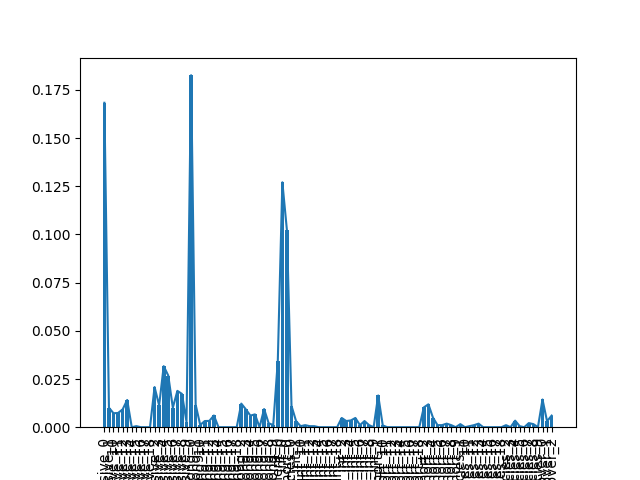

In [35]:
plt.plot([key for key in regimeAmounts.keys()],[val for val in regimeAmounts.values()])

In [36]:
plt.bar(range(len(regimeAmounts)), list(regimeAmounts.values()), align='center')
plt.xticks(range(len(regimeAmounts)), list(regimeAmounts.keys()),rotation="vertical")

([<matplotlib.axis.XTick at 0x7f310d04c310>,
 [Text(0, 0, 'SimOpt_extensive_0'),
  Text(0, 0, 'SimOpt_extensive_1'),
  Text(0, 0, 'SimOpt_extensive_10'),
  Text(0, 0, 'SimOpt_extensive_11'),
  Text(0, 0, 'SimOpt_extensive_12'),
  Text(0, 0, 'SimOpt_extensive_13'),
  Text(0, 0, 'SimOpt_extensive_14'),
  Text(0, 0, 'SimOpt_extensive_15'),
  Text(0, 0, 'SimOpt_extensive_16'),
  Text(0, 0, 'SimOpt_extensive_17'),
  Text(0, 0, 'SimOpt_extensive_18'),
  Text(0, 0, 'SimOpt_extensive_2'),
  Text(0, 0, 'SimOpt_extensive_3'),
  Text(0, 0, 'SimOpt_extensive_4'),
  Text(0, 0, 'SimOpt_extensive_5'),
  Text(0, 0, 'SimOpt_extensive_6'),
  Text(0, 0, 'SimOpt_extensive_7'),
  Text(0, 0, 'SimOpt_extensive_8'),
  Text(0, 0, 'SimOpt_extensive_9'),
  Text(0, 0, 'SimOpt_extensive_long_0'),
  Text(0, 0, 'SimOpt_extensive_long_1'),
  Text(0, 0, 'SimOpt_extensive_long_10'),
  Text(0, 0, 'SimOpt_extensive_long_11'),
  Text(0, 0, 'SimOpt_extensive_long_12'),
  Text(0, 0, 'SimOpt_extensive_long_13'),
  Text(0, 0,

## Export data as csv
- Solution_alldata contains the optimal regime per stand AND the timely development of indicator values plus all other input columns (represented_are_by_NFIplot, region, NUTS2)
- Solution contains only the selected optimal regime and its share (if multiple regimes per stand are selected)

In [37]:
try:
    os.mkdir("results")
except FileExistsError:
    pass
b = []
c = []
for key in mfo.regimesDecision.keys():
    if mfo.regimesDecision[key].solution_value() > 0:
        b = b+ [(key[0],x*5+2012, key[1]) for x in range(0,21)]
        c = c+ [(key[0],key[1],mfo.regimesDecision[key].solution_value())]
data2b = mfo.data.iloc[mfo.data.index.isin(b)]
data2b.to_csv("./results/"+scenario+"_"+RCP+"_data.csv")
c1 = pd.DataFrame(c)
c1.to_csv("./results/"+scenario+"_"+RCP+"_solutions.csv")

## Export objective ranges

Save as json file

In [38]:
import json
mfo.objectiveRanges

with open('./results/objectiveRanges_'+scenario+'_'+RCP+'.json', 'w') as json_file:
  json.dump(mfo.objectiveRanges, json_file)

Save as CSV.

In [39]:
df = pd.read_json('./results/objectiveRanges_'+scenario+'_'+RCP+'.json')

df.to_csv('./results/objectiveRanges_'+scenario+'_'+RCP+'.csv')

## Export objective values
The optimal solution for each objective.

In [40]:
with open("./results/objectiveValues_"+scenario+"_"+RCP+".csv","w") as file:
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+objName)
        delim = ","
    file.write("\n")
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+str(mfo.objective[objName].solution_value()))
        delim = ","
    file.write("\n")